In [1]:
# import data
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)

/Users/edmundfung/workspace/python/welcome/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [2]:
# create session
import tensorflow as tf
sess = tf.Session()
from keras import backend as K
K.set_session(sess)

Using TensorFlow backend.


In [3]:
# create nodes
img = tf.placeholder(tf.float32, shape=(None, 784))
labels = tf.placeholder(tf.float32, shape=(None, 10))

from keras.layers import Dense
x = Dense(512, activation='relu')(img)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [4]:
# create learning parameters
from keras.objectives import categorical_crossentropy
error = tf.reduce_mean(categorical_crossentropy(labels, predictions))
global_step = tf.Variable(0, trainable=False)

In [5]:
# init network
init = tf.global_variables_initializer()
sess.run(init)

In [6]:
# training parameters and setup
BATCH_SIZE = 250
ITERATIONS = 2000
LEARNING_RATE = 0.1

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

x = np.zeros(0)
y = np.zeros(0)


<IPython.core.display.Javascript object>


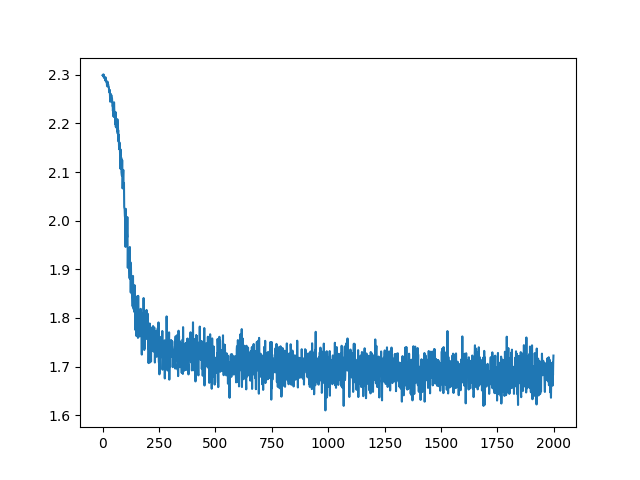

In [7]:
# train
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

learning_rate = tf.train.exponential_decay(LEARNING_RATE, global_step, BATCH_SIZE * ITERATIONS, 0.96, staircase=True)
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(error, global_step=global_step)

with sess.as_default():
    for i in range(ITERATIONS):
        batch = mnist_data.train.next_batch(BATCH_SIZE)
        _, err = sess.run([train_step, error], feed_dict={
            img: batch[0],
            labels: batch[1]
        })

        x = np.append(x, i)
        y = np.append(y, err)
        ax.clear()
        ax.plot(x, y)
        fig.canvas.draw()
        

In [8]:
# evaluate
from keras.metrics import categorical_accuracy as accuracy
acc_values = accuracy(labels, predictions)
with sess.as_default():
    results = acc_values.eval(feed_dict={
        img: mnist_data.test.images,
        labels: mnist_data.test.labels
    })
print(np.mean(results))

0.7777
